In [1]:
import mylib.ICA as ica
import mylib.IO as io
import matplotlib.pyplot as plt
from PIL import Image as im
from PIL import ImageOps as ops
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# load the data from files
pic1 = im.open('report2_all/report2_kadai3_data1/image1.png')
pic2 = im.open('report2_all/report2_kadai3_data1/image2.png')

# convert PIL.Image objects to numpy.1darrays
data1 = np.asarray(pic1)
data2 = np.asarray(pic2)
shape1 = data1.shape
shape2 = data2.shape
data1 = np.ravel(data1)
data2 = np.ravel(data2)
print(shape1, shape2)

(512, 512) (512, 512)


In [3]:
# make an array dataX
dataX = np.array((data1, data2))

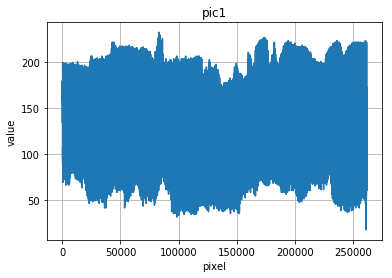

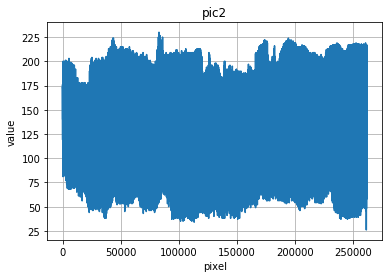

In [4]:
# show data1
io.plot_graph(dataX[0], 'pic1', 'pixel')
plt.show()

# show data2
io.plot_graph(dataX[1], 'pic2', 'pixel')
plt.show()

In [5]:
#linear conversion of every dataX[i] so that E[dataX[i]] = 0
dataX, meanarr = ica.make_mean_0(dataX)

In [6]:
# whiten dataX
dataZ = ica.whitening_data(dataX)

# calculate a matrix W
mat_W = ica.make_W(dataZ, 2)

In [7]:
# calculate two source
source = ica.find_source(mat_W, dataZ)

# standardize each source
source = io.standardize_png(source)

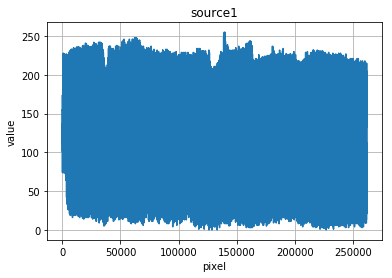

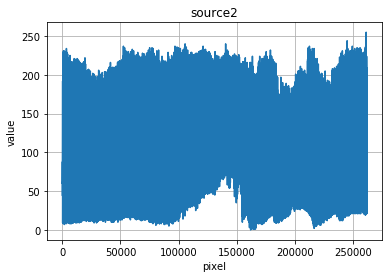

In [8]:
# show source1
io.plot_graph(source[0], 'source1', 'pixel')
plt.show()

# show source2
io.plot_graph(source[1], 'source2', 'pixel')
plt.show()

In [9]:
# convert each source to a PIL.Image objects
image1 = im.fromarray(source[0].reshape(shape1))
image2 = im.fromarray(source[1].reshape(shape2))

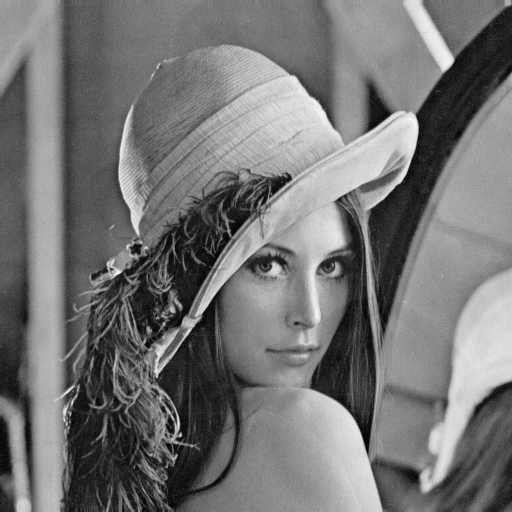

In [10]:
#show image1
image1

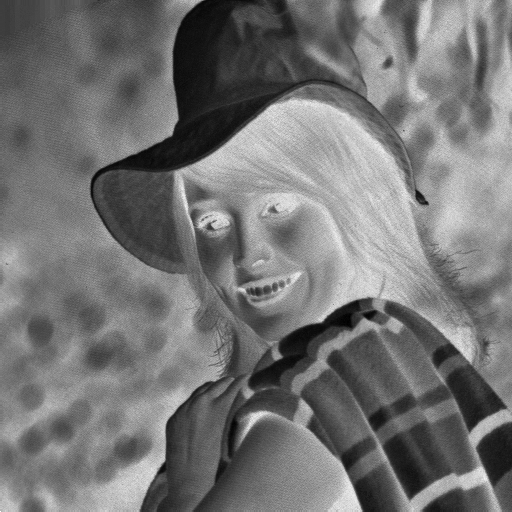

In [11]:
image2

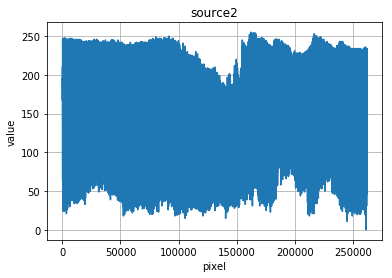

In [12]:
source[1] = 255 - source[1]
io.plot_graph(source[1], 'source2', 'pixel')
plt.show()

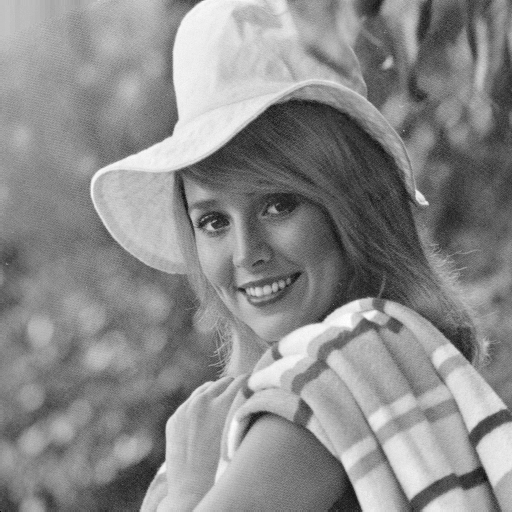

In [13]:
image2 = im.fromarray(source[1].reshape(shape2))
image2

In [14]:
image1.save('separated_source/kadai3/image1.png')
image2.save('separated_source/kadai3/image2.png')